# Ford Gobike Trends Report
Nov, 2020
by Zi Ye
## Investigation Overview
In this project, I explored the Ford Gobike usage data and investigated the trends in bike usage, as well as the relationship between riding duration, usage at different periods of time, and user types.

## Dataset Overview
This dataset was the Ford GoBike's trip data for bike rides. The cleaned dataset has 20 features and 174875 riding records. The 20 features can be further divided into 3 large classes: Trip time details such as duration_sec and start_time; Station details such as start station id; and user information such as user type and age.

In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import glob
import os

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df_clean = pd.read_csv('./bike_clean.csv')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174875 entries, 0 to 174874
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174875 non-null  int64  
 1   start_time               174875 non-null  object 
 2   end_time                 174875 non-null  object 
 3   start_station_id         174875 non-null  float64
 4   start_station_name       174875 non-null  object 
 5   start_station_latitude   174875 non-null  float64
 6   start_station_longitude  174875 non-null  float64
 7   end_station_id           174875 non-null  float64
 8   end_station_name         174875 non-null  object 
 9   end_station_latitude     174875 non-null  float64
 10  end_station_longitude    174875 non-null  float64
 11  bike_id                  174875 non-null  int64  
 12  user_type                174875 non-null  object 
 13  member_birth_year        174875 non-null  float64
 14  memb

In [3]:
# Create a new field for duration bin
df_clean['duration_bins'] = df_clean['duration_min'].apply(lambda x: '<5 min' if 0<x<=5
                                                  else '5 min - 10 min' if 5<x<=10
                                                  else '10 min - 30 min' if 10<x<=30
                                                  else '30 min - 1hr' if 30<x<=60
                                                  else '1hr - 2hr' if 60<x<=120
                                                  else '2hr - 5hr' if 120<x<=600
                                                  else '>5hr')


## User types and days of week
    Thursday is the day with the highest number pf trips, followed by Tuesday. Weekends have the least number of trips. The trend for subscribers usage of bike over a week is highly similar to that of total usage. There is a greater variation of usage for subscribers compared to customers, while customers have a more stable trend across the week. However, subscriber has much higher usage across the time, the large base number for subscriber  probably contribute to the large variation. 

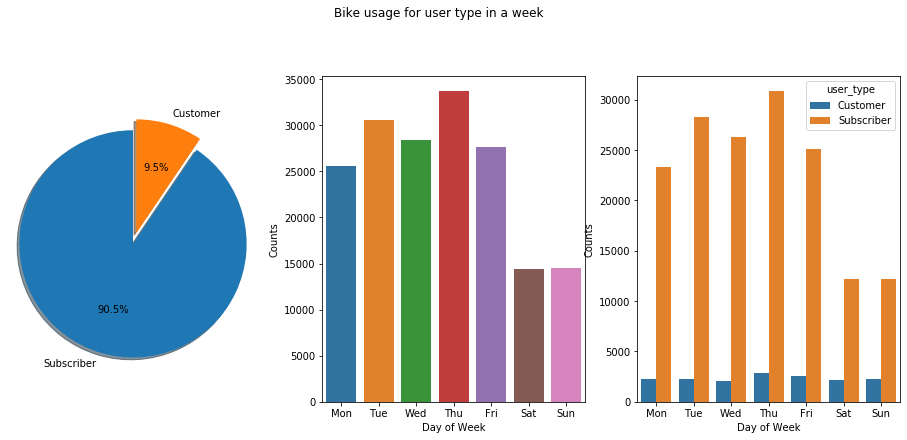

In [4]:
plt.figure(figsize=[16, 6]);


# plot bar graph and pie charts to check the distribution of constumer and subscribers
plt.rcParams['figure.figsize'] = 20, 10
colors=['blue', 'orange']

plt.subplot(1, 3, 1);
explode = (0.1, 0);
label=df_clean['user_type'].value_counts().index.tolist();
value=df_clean.user_type.value_counts();
plt.pie(value, explode=explode, labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90);
plt.axis('square')  # Equal aspect ratio ensures that pie is drawn as a circle.;

plt.subplot(1, 3, 2);
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
wkOrder = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays);
df_clean['Weekday'] = df_clean['Weekday'].astype(wkOrder);
weekdayLabel = pd.api.types.CategoricalDtype(ordered=True, categories=weekdays);
sb.countplot(data=df_clean, x='Weekday');
plt.xlabel('Day of Week');
plt.ylabel('Counts');

plt.subplot(1, 3, 3);
sb.countplot(data=df_clean, x='Weekday', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Counts');
plt.suptitle("Bike usage for user type in a week",y = 1.04);


## Duration of rides
    Majority of trips took less than 10 minutes. The distribution of duration in minutes is a skewed distribution that has a longer tail in the right section. Customers have higher duration compared to subsribers. Many trips with the duration below 30 mins occured at the two peak hour of day, 7:00-9:00 and 16:00 - 18:00. Not many trips for any durations from 0:00 - 5:00. The two time spans with high usage of bikes are 7:00-9:00 and 16:00 - 18:00. 
    

Text(0.5, 1, 'Number and duration of trips at different hours for days of week')

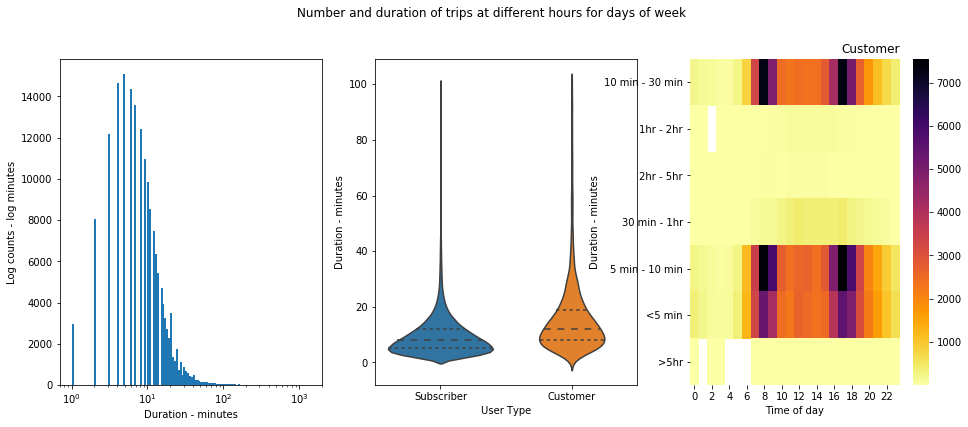

In [5]:
plt.figure(figsize=[16, 6]);


# plot bar graph and pie charts to check the distribution of durations
plt.rcParams['figure.figsize'] = 20, 10

plt.subplot(1, 3, 1);
# Rescale the histogram according to distribution
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_min'].max())+log_binsize, log_binsize)
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.ylabel('Log counts - log minutes');
plt.xlabel('Duration - minutes')
plt.suptitle('Log scale histogram of duration')

plt.subplot(1, 3, 2);
df_c5=df_clean.copy()
df_c5.duration_min=df_c5.duration_min.astype('int')
df_c5=df_c5[df_c5['duration_min']<=100]

plt.rcParams['figure.figsize'] = 4, 6
sb.violinplot(data=df_c5, x='user_type', y='duration_min',inner='quartile' );
plt.xlabel('User Type');
plt.ylabel('Duration - minutes');


plt.subplot(1, 3, 3);
# heat map for durations at differnt hours of a day
plt.rcParams['figure.figsize'] = 4,8
hm = df_clean.groupby(['duration_bins', 'Time of day']).size()
hm = hm.reset_index(name='count')
hm = hm.pivot(index='duration_bins', columns='Time of day', values='count')
sb.heatmap(hm, cmap='inferno_r');
plt.title('Customer', loc='right');
plt.xlabel('Time of day');
plt.ylabel('Duration - minutes');

plt.suptitle('Number and duration of trips at different hours for days of week', y=1)



## Day of week and time of day
    8:00 and 17:00 are the time with the most trips. This correspond to two time spans with high usage of bikes, which are 7:00-9:00 and 16:00 - 18:00 from Monday to Friday. However, for week ends, the usage reduce significantly. Also, there is moderate but consistend bike usage from 10:00 to 15:00 everyday throughout the week.

Text(0.5, 1, 'Number of trips at different hours for days of week')

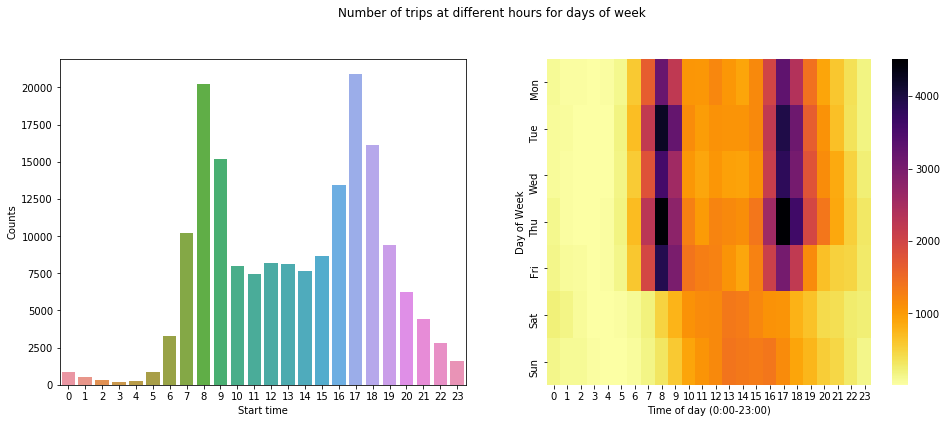

In [6]:
plt.figure(figsize=[16, 6]);


# plot bar graph and pie charts to check the distribution of durations
plt.rcParams['figure.figsize'] = 20, 10

plt.subplot(1, 2, 1);
# When are most trips taken in terms of time of day

plt.rcParams['figure.figsize'] = 8, 4

sb.countplot(data=df_clean, x='Time of day');
plt.xlabel('Start time');
plt.ylabel('Counts');




plt.subplot(1, 2, 2);
# heat map for trips at differnt hours of a day

plt.rcParams['figure.figsize'] = 8,8
hm = df_clean.groupby(['Weekday', 'Time of day']).size()
hm = hm.reset_index(name='count')
hm = hm.pivot(index='Weekday', columns='Time of day', values='count')
sb.heatmap(hm, cmap='inferno_r');
plt.xlabel('Time of day (0:00-23:00)');
plt.ylabel('Day of Week');

plt.suptitle('Number of trips at different hours for days of week', y=1)

## Summary
The average time for a trip is 11.2 minutes while the longest trip took 1402 minutes. However, majority of trips took less than 10 minutes. The distribution of duration in minutes is a skewed distribution that has a longer tail in the right section. 
As for starting time of the trip, 8:00 and 17:00 are the time with the most trips. Thursday is the day with the highest number pf trips, followed by Tuesday. Weekends have the least number of trips.
The multivariate exploration strengthened some findings about duration and daily usage in univariate and bivariant explorations, for example, the two time spans with high usage of bikes, which are 7:00-9:00 and 16:00 - 18:00. However, multivariant analysis also revealed that this is only valid from Monday to Friday. For week ends, the usage reduce significantly at those two time spans. Also, there is moderate but consistend bike usage from 10:00 to 15:00 everyday throughout the week, which was not found in previous analysis.
There are many trips that is at the duration below 30 mins occured at the two peak hour of day, 7:00-9:00 and 16:00 - 18:00. Not many trips for any durations from 0:00 - 5:00. This tells us that the peak hours trips are mostly short trips, while longer trips, such as 2hr-5hr trips, occurs constantly throughtout the day regardless of time.

In [7]:
!jupyter nbconvert slide_deck-Resubmission.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck-Resubmission.ipynb to slides
[NbConvertApp] Writing 423364 bytes to slide_deck-Resubmission.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Zi Ye\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Zi Ye\anaconda3\lib\site-packages\jupyter_core\application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Zi Ye\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Zi Ye\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\Zi Ye\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename